In [ ]:
from google.colab import drive
drive.mount("/content/titanic_prediction")

Mounted at /content/titanic_prediction


In [ ]:
#importing the necesarry libraies
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table).
#loading the train_data
train_data=pd.read_csv("/content/titanic_prediction/MyDrive/train.csv")
#printing the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
(train_data.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
pip install --upgrade matplotlib

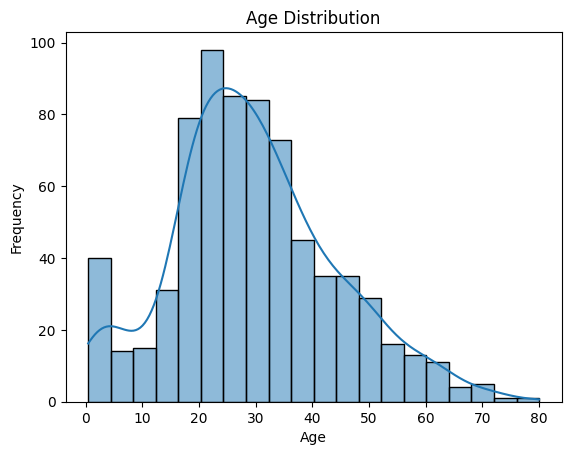

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram plot with KDE
sns.histplot(train_data['Age'], bins=20, kde=True)

# Add a title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

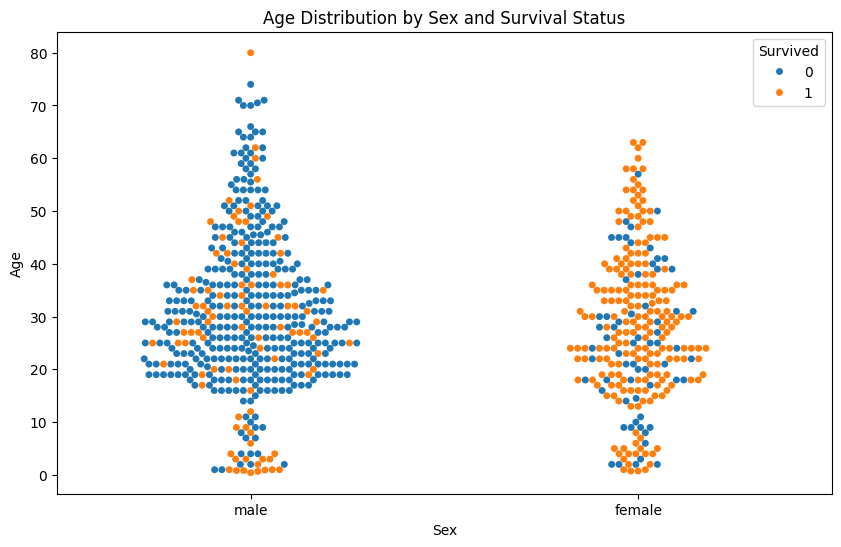

In [ ]:
# Create the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=train_data, x='Sex', y='Age', hue='Survived')

# Add title and labels
plt.title('Age Distribution by Sex and Survival Status')
plt.xlabel('Sex')
plt.ylabel('Age')

# Customize the legend
plt.legend(title='Survived', loc='upper right')

# Display the plot
plt.show()

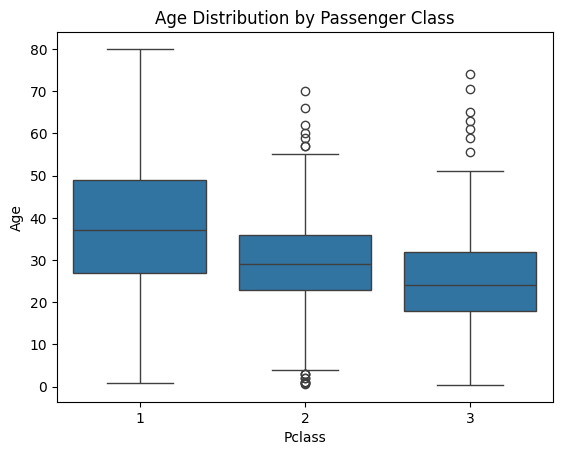

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Age Distribution by Passenger Class')
plt.show()

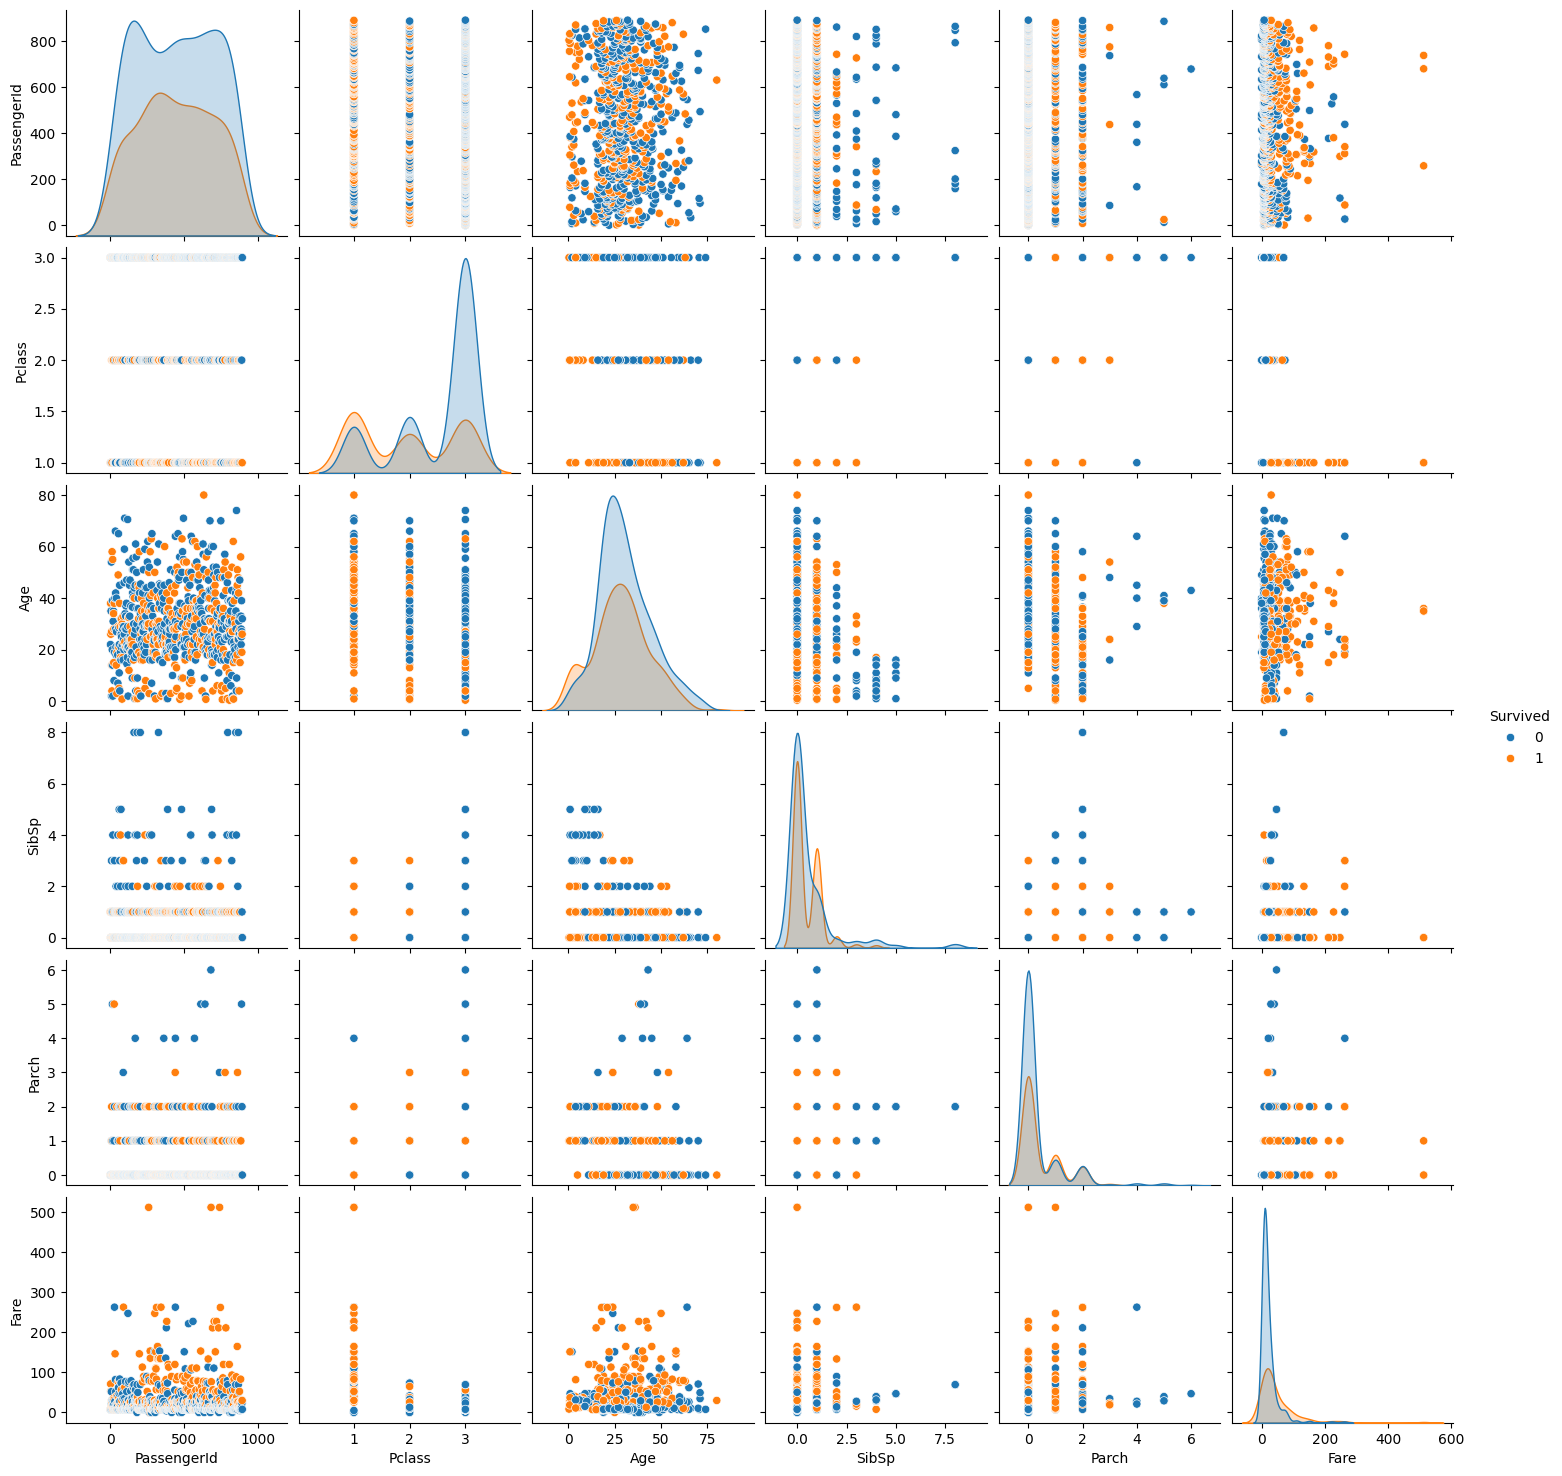

In [ ]:
sns.pairplot(train_data, hue='Survived')
plt.show()

In [ ]:
#Data Cleaning
#Handling Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])

In [ ]:

#Feature Engineering
#Creating New Features:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [ ]:
#Binning: Convert continuous variables into categorical ones.
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

In [ ]:
#Encoding Categorical Variables
#Label Encoding: Convert categorical variables to numeric codes.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
#One-Hot Encoding: Create dummy variables.
train_data = pd.get_dummies(train_data, columns=['Embarked'])

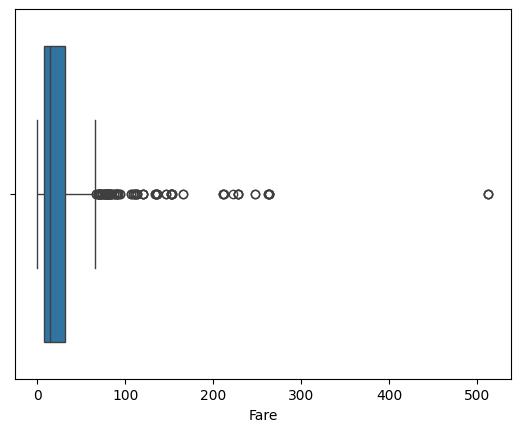

In [ ]:
#Outlier Detection
#Visual Methods: Use box plots or scatter plots to identify outliers.
sns.boxplot(x=train_data['Fare'])
plt.show()

In [ ]:
#Statistical Methods: Use z-scores or IQR methods to detect outliers.
from scipy import stats
z_scores = stats.zscore(train_data['Fare'])
outliers = train_data[np.abs(z_scores) > 3]
print(outliers)

     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   

                                                  Name  Sex        Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    1  19.000000      3   
88                          Fortune, Mi

In [ ]:
#Splitting the Data
#Train-Test Split: Split the data into training and testing sets.
from sklearn.model_selection import train_test_split
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

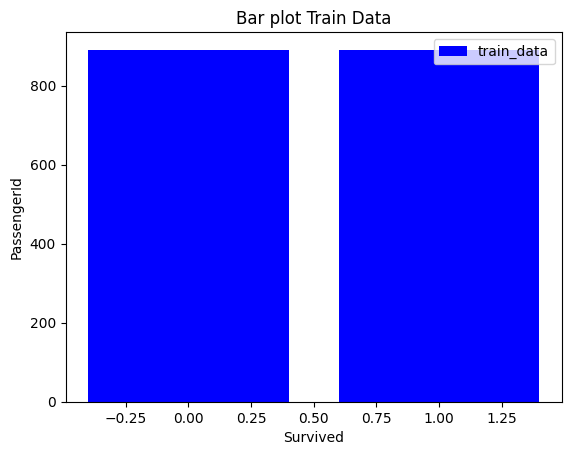

In [ ]:
import matplotlib.pyplot as plt
x1=train_data["Survived"]
y1=train_data["PassengerId"]
plt.bar(x1,y1,label="train_data",color='b')
plt.plot()

plt.xlabel("Survived")
plt.ylabel("PassengerId")
plt.title("Bar plot Train Data")
plt.legend()
plt.show()

In [ ]:
#train.csv contains the details of a subset of the passengers on board (418 passengers, to be exact -- where each passenger gets a different row in the table).
#loading the test_data
test_data=pd.read_csv("/content/titanic_prediction/MyDrive/test.csv")
#printing the data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


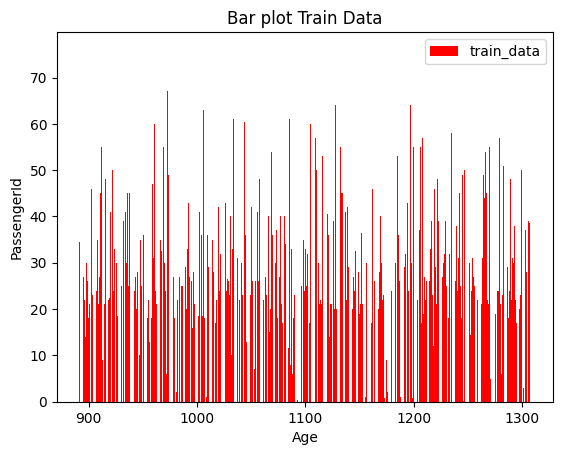

In [ ]:
import matplotlib.pyplot as plt
x1=test_data["PassengerId"]
y1=test_data["Age"]
plt.bar(x1,y1,label="train_data",color='r')
plt.plot()

plt.xlabel("Age")
plt.ylabel("PassengerId")
plt.title("Bar plot Train Data")
plt.legend()
plt.show()

In [ ]:
#finding % of women who survived from the train_data
women=train_data.loc[train_data.Sex == "female"]["Survived"]
#rate of women = sum of women who survived divided by total number of women present in the ship in the train_data
rate_women= sum(women)/len(women)
print("% of women who survived:",rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
#finding % of women who survived from the train_data
men=train_data.loc[train_data.Sex == "male"]["Survived"]
#rate of women = sum of women who survived divided by total number of women present in the ship in the train_data
rate_men= sum(men)/len(men)
print("% of men who survived:",rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#filtering out survived column from the train_data
y = train_data["Survived"]

#initializing features used for training model
features = ["Pclass", "Sex", "SibSp", "Parch"]

X_train= pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

#initializing the RandomForestclassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

#training the model RandomForestclassifier on the "x" with corresponding target value"y"
model.fit(X_train, y)

#using trained model to make predictions on the test data x_test
predictions=model.predict(X_test)

#creating DataFrame output containing passengergrid from test data and predicted survived values
output=pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predictions})

#writes output DataFrame to a cab file without including the index
output.to_csv('titanic_survival_output',index=False)

print("The output is saved in the titanic_survival_prediction_output")
(output)

The output is saved in the titanic_survival_prediction_output


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
